# Book Recommendation System

## Problem Statement

Recommendation systems are used in hundreds of different services - everywhere from online shopping to music to movies.

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The main objective of our project is to create book recommendation systems for users according to the features.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading all three datasets

In [2]:
books = pd.read_csv('Books.csv',encoding='latin-1')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\vinay\AppData\Local\Temp\ipykernel_13988\1890129283.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv',encoding='latin-1')


- #### Books Data

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.shape

(271360, 8)

- #### Users Data

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
users.shape

(278858, 3)

- #### Ratings Data

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.shape

(1149780, 3)

# EDA

- #### Merging users and ratings dataset

In [9]:
users_rating= users.merge(ratings,on='User-ID')
users_rating

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0
...,...,...,...,...,...
1149775,278854,"portland, oregon, usa",NaN,0425163393,7
1149776,278854,"portland, oregon, usa",NaN,0515087122,0
1149777,278854,"portland, oregon, usa",NaN,0553275739,6
1149778,278854,"portland, oregon, usa",NaN,0553578596,0


- #### Merging books with users and ratings dataset

In [10]:
books_users_rating= users_rating.merge(books,on='ISBN')
books_users_rating.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [11]:
books_users_rating.shape

(1031136, 12)

In [12]:
books_users_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


## Check for null values 

In [13]:
books_users_rating.isnull().sum()

User-ID                     0
Location                    0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

In [14]:
books_users_rating=books_users_rating.dropna()

In [15]:
books_users_rating.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [16]:
books_users_rating.shape

(753296, 12)

## Checking for duplicate values

In [17]:
books_users_rating.duplicated().sum()

0

In [18]:
books_users_rating.describe()

,User-ID,Age,Book-Rating
count,753296.000000,753296.000000,753296.000000
mean,141231.207581,37.397658,2.768896
std,78828.594808,14.098257,3.864231
min,2.000000,0.000000,0.000000
25%,74453.000000,28.000000,0.000000
50%,141493.000000,35.000000,0.000000
75%,209156.000000,45.000000,7.000000
max,278852.000000,244.000000,10.000000


- We can see Age column has max value of 244 which is definitely a outlier

## Outlier detection

In [19]:
outliers=books_users_rating[books_users_rating["Age"]>100]
outliers.tail()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1025428,267830,"fort worth, texas, usa",101.0,0931722179,10,Nekkid cowboy,Katie Breeze,1982,Corona Pub. Co,http://images.amazon.com/images/P/0931722179.0...,http://images.amazon.com/images/P/0931722179.0...,http://images.amazon.com/images/P/0931722179.0...
1025429,267830,"fort worth, texas, usa",101.0,0965870707,8,Threadbear: A Story of Christian Healing for A...,Tilda Norberg,1997,Penn Haus Press,http://images.amazon.com/images/P/0965870707.0...,http://images.amazon.com/images/P/0965870707.0...,http://images.amazon.com/images/P/0965870707.0...
1025430,267830,"fort worth, texas, usa",101.0,1559345233,8,"Frauds, Myths, and Mysteries: Science and Pseu...",Kenneth L. Feder,1996,McGraw Hill College Div,http://images.amazon.com/images/P/1559345233.0...,http://images.amazon.com/images/P/1559345233.0...,http://images.amazon.com/images/P/1559345233.0...
1025431,267830,"fort worth, texas, usa",101.0,1565301935,9,Cigar Chic: A Woman's Perspective,Tomima Edmark,1995,Summit Publishing Group,http://images.amazon.com/images/P/1565301935.0...,http://images.amazon.com/images/P/1565301935.0...,http://images.amazon.com/images/P/1565301935.0...
1029329,276048,"wien, wien, austria",127.0,0139531831,0,PC Power Secrets: How to Make Any PC Run Faster,Stephen J. Dougherty,1992,M&amp;T Press,http://images.amazon.com/images/P/0139531831.0...,http://images.amazon.com/images/P/0139531831.0...,http://images.amazon.com/images/P/0139531831.0...


In [20]:
outliers.shape

(2910, 12)

- There are 2910 people whose age is greater than 100 years so we treat them as outliers and remove them 

## Removing outliers

In [21]:
books_users_rating=books_users_rating[books_users_rating["Age"]<100]

In [22]:
books_users_rating.head(3)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
5,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


# Data Pre-processing

- #### Creating 3 new columns city,state and country from the Location column 

In [23]:
books_users_rating[['city' , 'state' , 'country']] = books_users_rating['Location'].str.split(',', expand=True , n=2)
books_users_rating.drop(columns="Location",inplace=True)

In [24]:
books_users_rating.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,city,state,country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,stockton,california,usa
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada
6,85526,36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,victoria,british columbia,canada
7,96054,29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada


## Data Visualization

#### Age Distribution of users

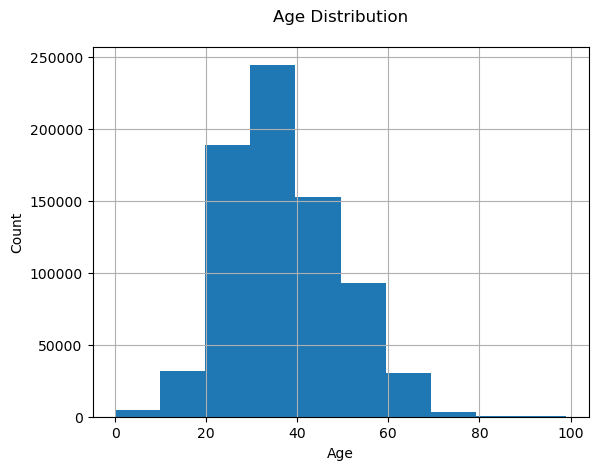

In [25]:
books_users_rating["Age"].hist()
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


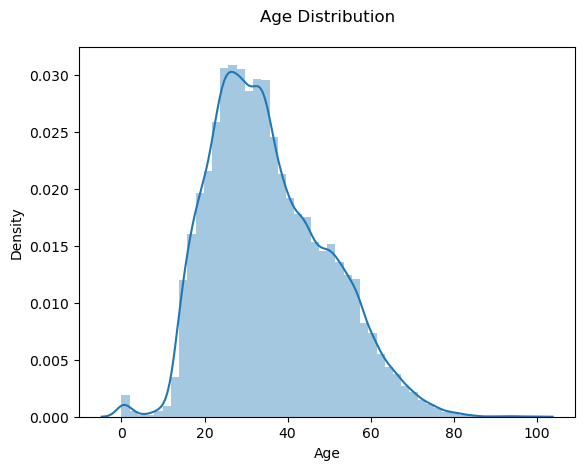

In [26]:
#Age distribution of users
age_df=users[users['User-ID'].isin(list(books_users_rating['User-ID'].unique()))]
sns.distplot(age_df.Age)
plt.title('Age Distribution\n')
plt.show()

- The majority of readers are between the ages of 25 and 40.
- Readers who are 80 to 100 years old make up a tiny minority.

### Rating Distribution

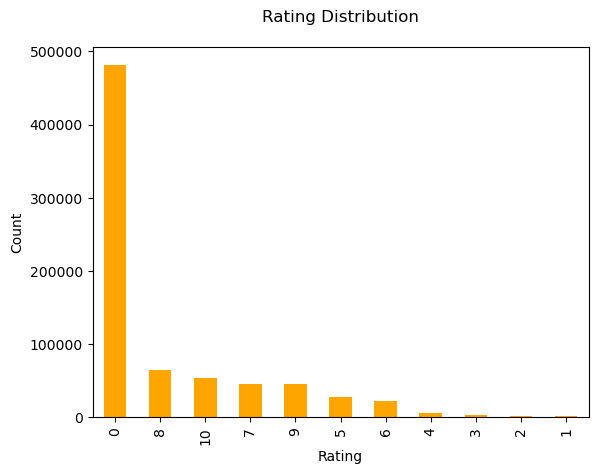

In [27]:
books_users_rating["Book-Rating"].value_counts(sort=True).plot(kind='bar',color="orange")
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- There are nearly 480000 books that have zero ratings 

In [28]:
non_zero_rated_books=books_users_rating[books_users_rating["Book-Rating"]!=0]
non_zero_rated_books.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,city,state,country
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada
13,219008,60.0,0002005018,7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,halifax,nova scotia,canada
14,263325,27.0,0002005018,6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,fredericton,new brunswick,canada
16,2954,71.0,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,wichita,kansas,usa
17,152827,40.0,0060973129,7,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,ottawa,ontario,canada


<AxesSubplot:title={'center':'\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

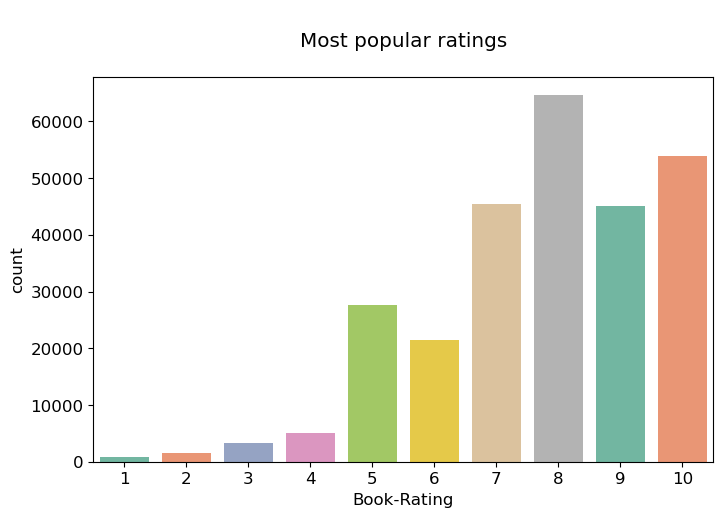

In [29]:
# most popular rating among non zero rated books
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=books_users_rating, x=non_zero_rated_books["Book-Rating"],palette='Set2')

- Most of users have given above 4 ratings to books
- 8 is the most common rating given by users

## Publisher with most books 

Text(0.5, 1.0, 'Top ten publishers in terms of number of books published')

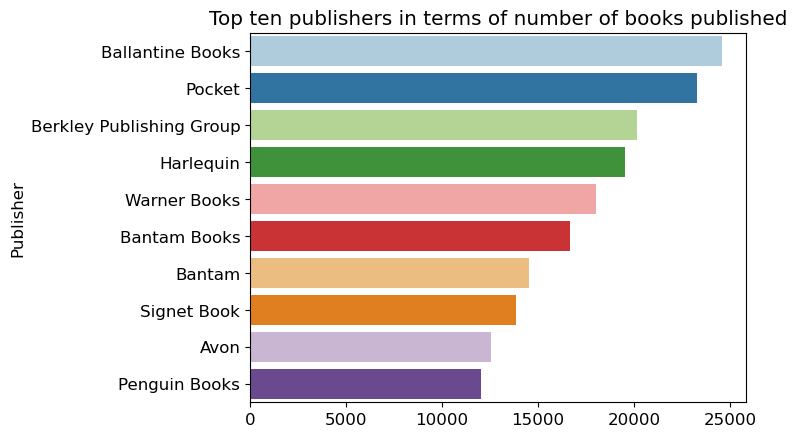

In [30]:
#Companies with the most number of books published
popular_publishers=books_users_rating.groupby('Publisher')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers in terms of number of books published')

Ballantine Books is most popular publisher based on book-title count.

### Top Selling Books

In [31]:
books_users_rating.groupby('Book-Title')['User-ID'].count().nlargest(10)

Book-Title
Wild Animus                                        2137
The Lovely Bones: A Novel                           917
The Da Vinci Code                                   703
Bridget Jones's Diary                               599
The Nanny Diaries: A Novel                          572
Angels &amp; Demons                                 548
The Secret Life of Bees                             544
A Painted House                                     514
Divine Secrets of the Ya-Ya Sisterhood: A Novel     513
Life of Pi                                          513
Name: User-ID, dtype: int64

Text(0.5, 1.0, 'Top selling books')

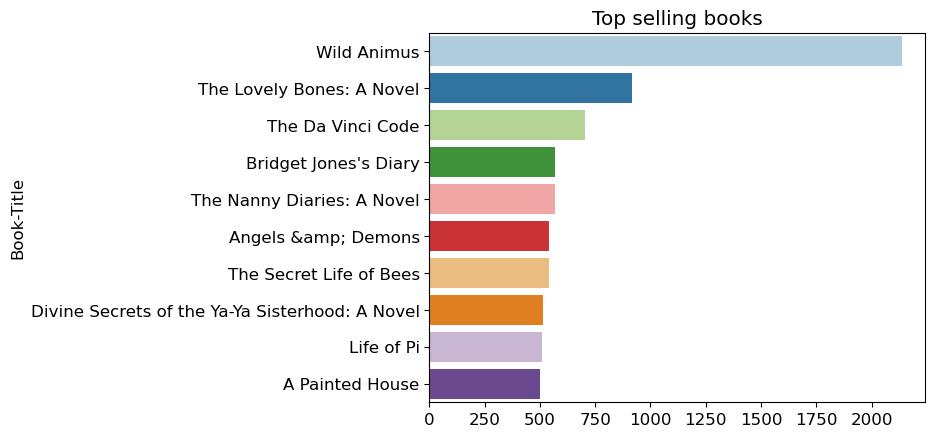

In [32]:
#Top selling books 
most_purchased_books=books_users_rating.groupby('Book-Title')['User-ID'].nunique().nlargest(10)
sns.barplot(x=most_purchased_books.values,y=most_purchased_books.index,palette='Paired')
plt.title('Top selling books')

### Most Popular Author

<AxesSubplot:title={'center':'\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

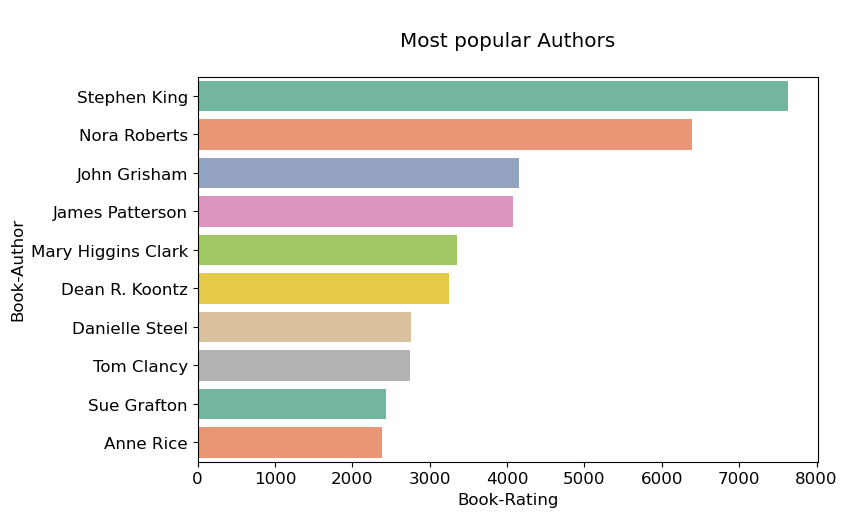

In [33]:
# most popular book authors
author = books_users_rating.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

Most popular book author with respect to the number of ratings is Stephen King.

## Top Rated Book

Text(0.5, 1.0, 'Top rated books')

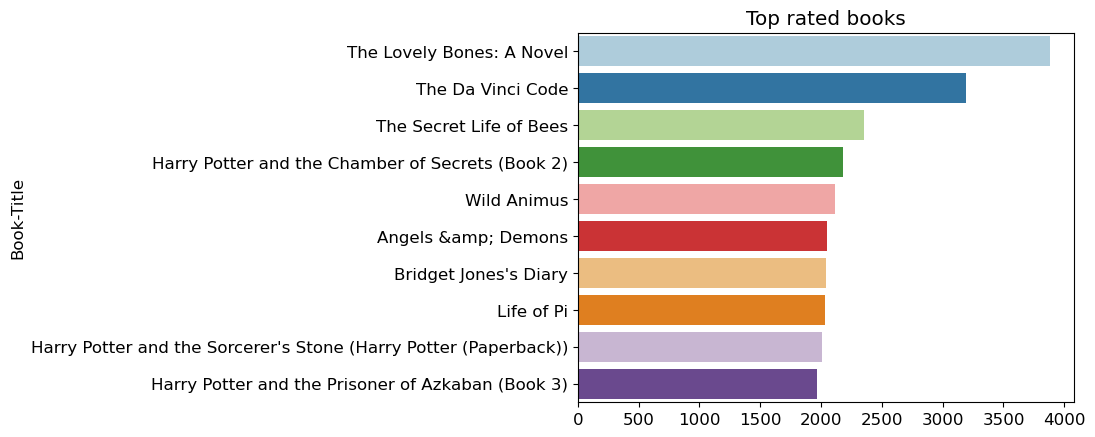

In [34]:
#Top-rated books
top_rated_books=books_users_rating.groupby('Book-Title')['Book-Rating'].sum().nlargest(10)
sns.barplot(x=top_rated_books.values,y=top_rated_books.index,palette='Paired')
plt.title('Top rated books')  

### Year-wise Count Of Books Published

Text(0.5, 1.0, 'Yearwise count of Books published')

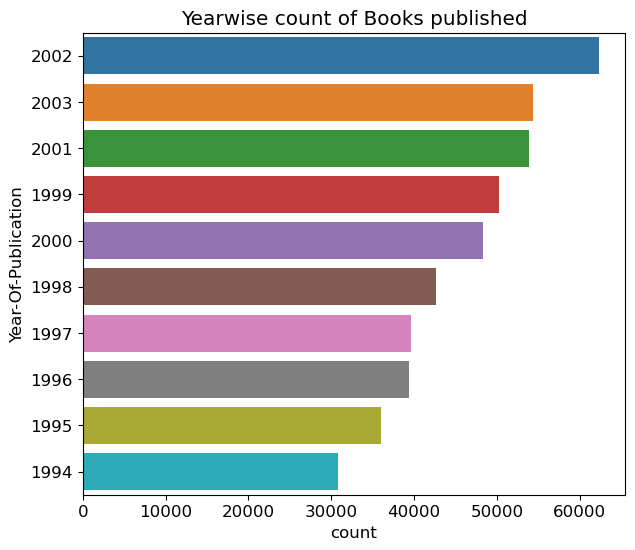

In [35]:
plt.figure(figsize=(7,6))
sns.countplot(y='Year-Of-Publication', data=books_users_rating,order=books_users_rating['Year-Of-Publication'].value_counts().index[0:10])
plt.title('Yearwise count of Books published')

### Countries With Most Readers

Text(0.5, 0, 'No of users')

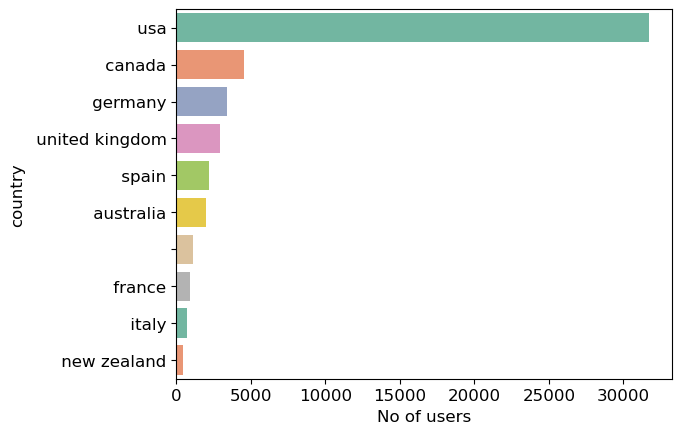

In [36]:
countries = books_users_rating.groupby('country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

Most of the readers are from the United States

### State With Most Readers 

Text(0.5, 0, 'No of users')

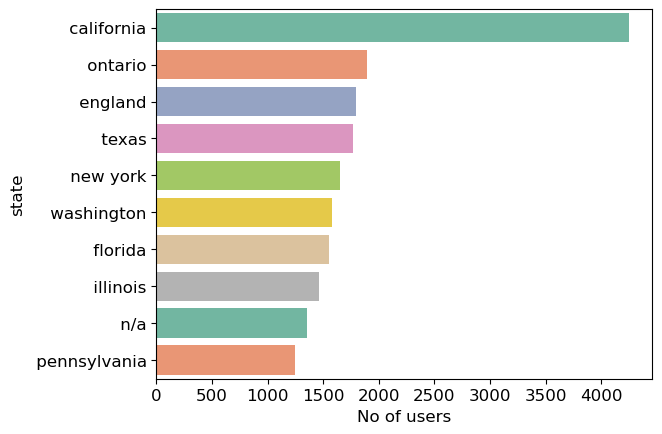

In [37]:
states = books_users_rating.groupby('state')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=states, y='state', x='User-ID',palette='Set2')
plt.xlabel('No of users')

### Cities With Most Readers

Text(0.5, 0, 'No of users')

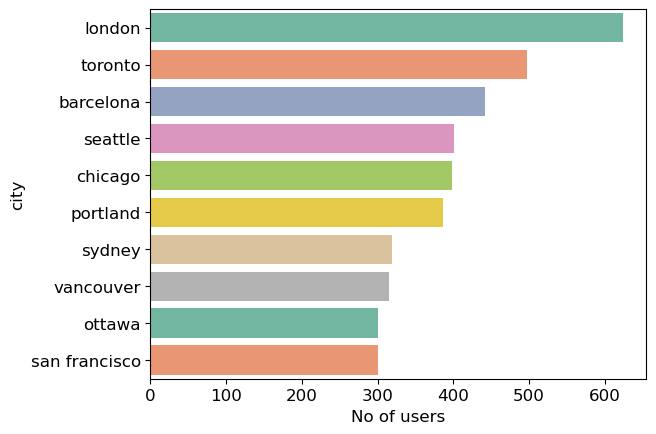

In [38]:
cities = books_users_rating.groupby('city')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=cities, y='city', x='User-ID',palette='Set2')
plt.xlabel('No of users')

### Observations Based On Age Groups

In [39]:
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13.0:
    x='Children'
  elif age>=13.0 and age<18.0:
    x='Teens'
  elif age>=18.0 and age<36.0:
    x='Youth'
  elif age>=36.0 and age<56.0:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [40]:
books_users_rating['Age_group']=books_users_rating['Age'].apply(lambda x: age_group(x))

In [41]:
books_users_rating.head(5)

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,city,state,country,Age_group
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,stockton,california,usa,Youth
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada,Middle aged adults
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,toronto,ontario,canada,Youth
6,85526,36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,victoria,british columbia,canada,Middle aged adults
7,96054,29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,ottawa,ontario,canada,Youth


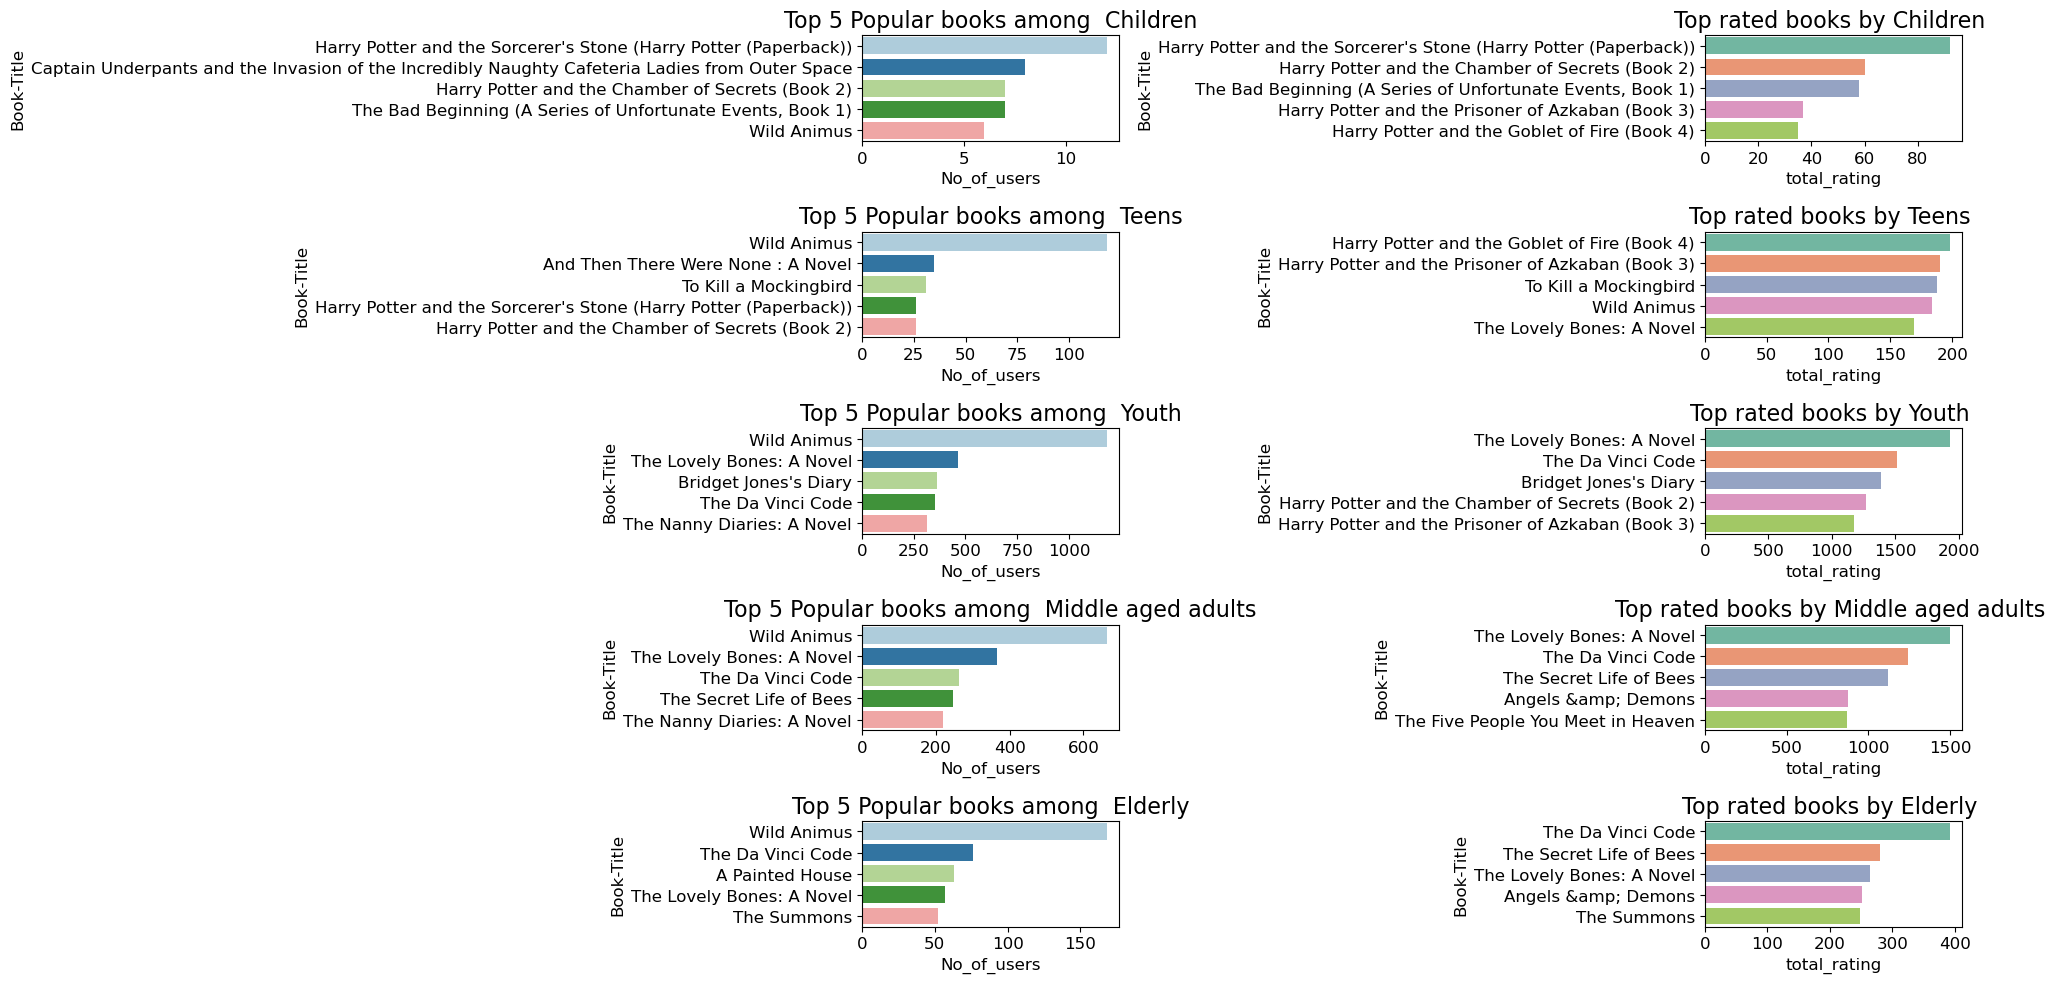

In [42]:
fig=plt.figure(figsize=(20,10))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=books_users_rating.loc[books_users_rating['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

## EDA CONCLUSIONS

- Wild Animus is the most read book among all age groups.
- Most popular book author based on the number of ratings is Stephen King .
- Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.
- The majority of readers are between the ages of 25 and 40.
- The majority of readers who have given the books ratings are from the United States and Canada.
- The Lovely Bones is the top rated book among Youth & Middle-aged Adults.

# Popularity Based  Recommender system

- ### Top 50 books with highest average ratings

In [43]:
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [121]:
# merging books and ratings dataset on ISBN no attribute
ratings_with_name = ratings.merge(books,on='ISBN')

In [132]:
# creating a dataframe with book title and number of ratings on the book(Book-ratings)
# we will use reset_index() to form a dataframe otherwise it will be a list

num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [46]:
# we will calculate the average rating using mean function

avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [47]:
# Now the final dataframe will be popular_df after merging above two dataframes on Book Title attribute

popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Book-Rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


- ### Considering those books whose book rating is more than 250

In [48]:
#filtering books with num_rating>250 and then sorting the books and displaying top 50 books

popular_df = popular_df[popular_df['Book-Rating']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,Book-Rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [49]:
# Some books have duplicate titles , so droping duplicates and the displaying title, Author,Image,num_rating,avg_rating

popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Book-Rating','avg_rating']]

In [50]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Book-Rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


# Collaborative Filtering Based Recommender System

- ### Approach : We will select those users who have rated more than 200 books and select books which are rated by more than 50  users so as to get more accurate results for the model

In [51]:
users.shape

(278858, 3)

In [52]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [53]:
ratings.shape

(1149780, 3)

In [54]:
# no of books each user has read
ratings["User-ID"].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [55]:
ratings["User-ID"].value_counts().shape

(105283,)

In [56]:
## since there are many users in order to make the recommendation system more accurate we will filter out those users who have read more than 200 books

In [57]:
x=ratings["User-ID"].value_counts()>200

In [58]:
selected_users=x[x].index

In [59]:
selected_users

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [60]:
# filtering the rating datset based on the selected users
ratings=ratings[ratings["User-ID"].isin(selected_users)]

In [61]:
ratings.shape

(526356, 3)

In [62]:
ratings.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [63]:
ratings_with_books=ratings.merge(books,on="ISBN")

In [64]:
ratings_with_books.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [65]:
book_rating=ratings_with_books.groupby("Book-Title")["Book-Rating"].count().reset_index()

In [66]:
book_rating.rename(columns={"Book-Rating":"no of ratings"},inplace=True)

In [67]:
book_rating.sort_values(by="no of ratings",ascending=False)

,Book-Title,no of ratings
156313,Wild Animus,363
19140,Bridget Jones's Diary,277
130224,The Lovely Bones: A Novel,270
132891,The Notebook,241
133898,The Pelican Brief,236
...,...,...
93081,Portrait of the Psychopath as a Young Woman,1
38031,"Edge of Love (Silhouette Intimate Moments, #13)",1
93078,Portrait of the Artist as a Young Man (Twentie...,1
93077,Portrait of the Artist as a Young Dog,1


In [68]:
final_df=book_rating.merge(ratings_with_books,on="Book-Title")

In [69]:
final_df.head(2)

,Book-Title,no of ratings,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,A Light in the Storm: The Civil War Diary of ...,2,35859,0590567330,0,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...
1,A Light in the Storm: The Civil War Diary of ...,2,96448,0590567330,9,Karen Hesse,1999,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...


In [70]:
## We will only select those books which has more than 50 ratings to get more accurate results

In [71]:
final_df=final_df[final_df["no of ratings"]>=50]

In [72]:
final_df.shape

(61853, 11)

In [73]:
final_df.drop_duplicates(["User-ID","Book-Title"],inplace=True)

In [74]:
final_df.shape

(59850, 11)

In [75]:
final_df.head(1)

,Book-Title,no of ratings,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1073,1984,76,254,0451524934,9,George Orwell,1990,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...


## Rating matrix

- ### We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [76]:
book_pivot=final_df.pivot_table(columns="User-ID",index="Book-Title",values="Book-Rating")

In [77]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [78]:
#replace NaN values with zero
book_pivot.fillna(0,inplace=True)

In [79]:
book_pivot.sample(10)

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
Voyager,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anne of Avonlea (Anne of Green Gables Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lucky : A Memoir,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phantoms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stanislaski Brothers (Silhouette Promo),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
About a Boy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The House of the Spirits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jewel (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Deck the Halls (Holiday Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
from scipy.sparse import csr_matrix

In [81]:
book_sparse=csr_matrix(book_pivot)

In [82]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

# Cosine similarity

- Cosine similarity is a metric used to measure the similarity of two vectors. Specifically, it measures the similarity in the direction or orientation of the vectors ignoring differences in their magnitude or scale. Both vectors need to be part of the same inner product space. The similarity of two vectors is measured by the cosine of the angle between them.

In [83]:
from sklearn.metrics.pairwise import cosine_similarity 

In [84]:
similarity=cosine_similarity(book_pivot)

In [85]:
similarity.shape

(742, 742)

In [86]:
similarity

array([[1.        , 0.07624004, 0.        , ..., 0.09387814, 0.04480685,
        0.03286937],
       [0.07624004, 1.        , 0.27421749, ..., 0.07424784, 0.16365457,
        0.15050832],
       [0.        , 0.27421749, 1.        , ..., 0.04732923, 0.05195619,
        0.11178963],
       ...,
       [0.09387814, 0.07424784, 0.04732923, ..., 1.        , 0.07085128,
        0.03898126],
       [0.04480685, 0.16365457, 0.05195619, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.03286937, 0.15050832, 0.11178963, ..., 0.03898126, 0.13208788,
        1.        ]])

In [87]:
####################################################################################################

In [88]:
np.where(book_pivot.index=='Animal Farm')[0][0]

54

In [89]:
similarity[54]

array([0.26347625, 0.06360426, 0.03923162, 0.07388729, 0.12093893,
       0.07693256, 0.15256564, 0.        , 0.        , 0.        ,
       0.        , 0.0807071 , 0.        , 0.07093771, 0.06044524,
       0.09055962, 0.0613354 , 0.07353935, 0.06395813, 0.0532316 ,
       0.10705905, 0.07795178, 0.16146186, 0.        , 0.        ,
       0.0173036 , 0.        , 0.05313412, 0.07192243, 0.09961275,
       0.09181927, 0.03961607, 0.07914753, 0.        , 0.12926874,
       0.01144752, 0.        , 0.04059324, 0.06911795, 0.09279469,
       0.05246762, 0.12995727, 0.03392411, 0.05419017, 0.07451115,
       0.07206042, 0.16899244, 0.        , 0.09099606, 0.11323153,
       0.        , 0.06719402, 0.22886811, 0.        , 1.        ,
       0.0952753 , 0.0272811 , 0.        , 0.        , 0.07358923,
       0.        , 0.09659112, 0.        , 0.1373708 , 0.04508058,
       0.10637828, 0.06651132, 0.05431464, 0.06968323, 0.        ,
       0.09116304, 0.        , 0.0629242 , 0.05613097, 0.01941

In [90]:
list(enumerate(similarity[54]))

[(0, 0.2634762509240882),
 (1, 0.06360426379011544),
 (2, 0.03923162122925061),
 (3, 0.07388729370184804),
 (4, 0.12093892592366537),
 (5, 0.0769325587553565),
 (6, 0.1525656414287556),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.08070710066514386),
 (12, 0.0),
 (13, 0.07093770956833247),
 (14, 0.06044523987918554),
 (15, 0.09055962372486796),
 (16, 0.06133539615110774),
 (17, 0.0735393523360399),
 (18, 0.063958126512158),
 (19, 0.053231604393946724),
 (20, 0.10705904559232324),
 (21, 0.07795177555827824),
 (22, 0.1614618583934794),
 (23, 0.0),
 (24, 0.0),
 (25, 0.017303602383262576),
 (26, 0.0),
 (27, 0.053134118490447635),
 (28, 0.0719224346416329),
 (29, 0.09961275487955307),
 (30, 0.09181927405667913),
 (31, 0.039616069594870434),
 (32, 0.07914752932445435),
 (33, 0.0),
 (34, 0.12926873950146067),
 (35, 0.011447523657343757),
 (36, 0.0),
 (37, 0.04059324218517337),
 (38, 0.06911795253519318),
 (39, 0.09279468724794329),
 (40, 0.05246762384989402),
 (41, 0.1299572657402489)

In [91]:
sorted(list(enumerate(similarity[54])),key=lambda x:x[1],reverse=True)

[(54, 0.9999999999999998),
 (0, 0.2634762509240882),
 (52, 0.22886811001678986),
 (337, 0.22717713411296842),
 (440, 0.22037326786800016),
 (321, 0.20512997834481383),
 (90, 0.2037278418152411),
 (100, 0.1834144055968956),
 (94, 0.17824562245829648),
 (731, 0.17608506945880198),
 (184, 0.17125798557141955),
 (682, 0.16939422832878553),
 (46, 0.16899244041164507),
 (188, 0.16876392612291996),
 (526, 0.16829395837177438),
 (642, 0.16825249986625093),
 (316, 0.16801504755112118),
 (451, 0.16590992153433282),
 (22, 0.1614618583934794),
 (212, 0.15930520258564893),
 (202, 0.15684405100347246),
 (459, 0.15456901117512478),
 (304, 0.15437300374676335),
 (684, 0.15348336003209756),
 (165, 0.15333419494485795),
 (727, 0.15260368729580326),
 (6, 0.1525656414287556),
 (703, 0.15197638592001614),
 (702, 0.15031680533557573),
 (358, 0.14929378404184554),
 (248, 0.14785438882757687),
 (399, 0.1467435457753971),
 (95, 0.1455778912212792),
 (268, 0.14476508428726909),
 (659, 0.14471233831310595),
 (32

In [92]:
similar_items=sorted(list(enumerate(similarity[54])),key=lambda x:x[1],reverse=True)[1:7]
similar_items

[(0, 0.2634762509240882),
 (52, 0.22886811001678986),
 (337, 0.22717713411296842),
 (440, 0.22037326786800016),
 (321, 0.20512997834481383),
 (90, 0.2037278418152411)]

In [93]:
suggestion=[]
for i in similar_items:
    suggestion.append(i[0])

In [94]:
suggestion

[0, 52, 337, 440, 321, 90]

In [95]:
name=[]
for i in suggestion:
    name.append(book_pivot.index[i])
name

['1984',
 'Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
 'Midnight',
 'Second Nature',
 'Lord of the Flies',
 'Brave New World']

In [96]:
xx=[]
for i in name:
    ids = np.where(books['Book-Title'] == i)[0][0]
    xx.append(ids)
xx

[2104, 7603, 3619, 9722, 1757, 4114]

In [97]:
url=[]
for i in xx:
    ul=books.iloc[i]["Image-URL-M"]
    url.append(ul)
url

['http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0399501487.01.MZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg']

In [98]:
###############################################################################

- ### Function for recommendation

In [99]:
def recommend_book(book_name):
    index=np.where(book_pivot.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity[index])),key=lambda x:x[1],reverse=True)[1:7]
    print("Recommendations for {} are:\n".format(book_name))
    for i in similar_items:
        print(book_pivot.index[i[0]])
        print(" with similarity of:",i[1])

In [100]:
# Testing
recommend_book('Message in a Bottle')

Recommendations for Message in a Bottle are:

Nights in Rodanthe
 with similarity of: 0.3183033118533456
A Walk to Remember
 with similarity of: 0.29233825484669085
River's End
 with similarity of: 0.27614941900170387
The Mulberry Tree
 with similarity of: 0.2607893961124157
Sanctuary
 with similarity of: 0.2457042918654605
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)
 with similarity of: 0.23752630676633382


In [101]:
book_pivot.index[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [102]:
# Testing 
recommend_book('Harry Potter and the Chamber of Secrets (Book 2)')

Recommendations for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
 with similarity of: 0.5973639548502973
Harry Potter and the Goblet of Fire (Book 4)
 with similarity of: 0.5589954393059721
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
 with similarity of: 0.46715741950480333
Harry Potter and the Sorcerer's Stone (Book 1)
 with similarity of: 0.4575579120821337
Harry Potter and the Order of the Phoenix (Book 5)
 with similarity of: 0.3502900592076637
Charlotte's Web (Trophy Newbery)
 with similarity of: 0.25471924100718624


In [103]:
# Testing
recommend_book('Chromosome 6')

Recommendations for Chromosome 6 are:

Acceptable Risk
 with similarity of: 0.5014573291415392
Vector
 with similarity of: 0.38725433094683714
The Killing Game: Only One Can Win...and the Loser Dies
 with similarity of: 0.37714742419047875
Invasion
 with similarity of: 0.34633162257188543
The Hot Zone
 with similarity of: 0.32011355087126325
Harvest
 with similarity of: 0.29950318995669795


In [104]:
#keeping books name
book_names = book_pivot.index

In [105]:
book_names

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=742)

In [106]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(book_pivot,open('book_pivot.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(book_names,open('book_names.pkl','wb'))